Zad 1. 
Dwa prostokąty. Są zdefiniowane przez współrzędne dwóch przeciwległych wierzchołków; np. pierwszy prostokąt (1,3) i (5,7) (na wejściu mamy 4 współrzędne podane), nie wiadomo które to z przeciwległych wierzchołków (czy to dolny lewy i górny prawy, czy górny lewy i dolny prawy) i my mamy znaleźć prostokąt który jest częścią wspólną tych prostokątów (najlepiej ifami) i zapisać ten znaleziony jako dwa przeciwległe wierzchołki i jego pole i obwód znaleźć. (wsp. tych prostokątów na wejściu są całkowite)

Przecięcie prostokątów: (4, 4) i (5, 5)
Pole: 1
Obwód: 4


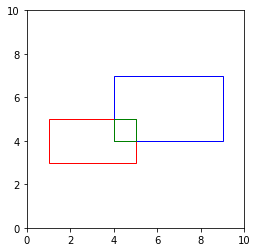

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


def find_rectangle_intersection(rect1, rect2):
    x1_min, x1_max = sorted(rect1[::2])
    y1_min, y1_max = sorted(rect1[1::2])
    x2_min, x2_max = sorted(rect2[::2])
    y2_min, y2_max = sorted(rect2[1::2])

    left, right = max(x1_min, x2_min), min(x1_max, x2_max)
    bottom, top = max(y1_min, y2_min), min(y1_max, y2_max)

    if left < right and bottom < top:
        area = (right - left) * (top - bottom)
        perimeter = 2 * ((right - left) + (top - bottom))
        return [left, bottom, right, top, area, perimeter]
    
    # Jeśli prostokąty się nie przecinają, zwracamy None
    return None



def draw_rectangles(rect1, rect2, intersection):
    fig, ax = plt.subplots()

    def draw_rect(rect, color):
        ax.add_patch(patches.Rectangle((min(rect[0], rect[2]), min(rect[1], rect[3])), 
                                       abs(rect[2] - rect[0]), abs(rect[3] - rect[1]), 
                                       linewidth=1, edgecolor=color, facecolor='none'))

    draw_rect(rect1, 'r')
    draw_rect(rect2, 'b')

    if intersection:
        draw_rect(intersection[:4], 'g')

    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    
    
# Przykładowe użycie
rect1 = [1, 3, 5, 5]
rect2 = [4, 4, 9, 7]
result = find_rectangle_intersection(rect1, rect2)


if result:
    left, bottom, right, top, area, perimeter = result
    print(f"Przecięcie prostokątów: ({left}, {bottom}) i ({right}, {top})")
    print(f"Pole: {area}")
    print(f"Obwód: {perimeter}")
else:
    print("Prostokąty się nie przecinają.")

 
draw_rectangles(rect1, rect2, result)

Zad 2.
Dany jest wielomian a = [ 1, 2, 3, 5 ,7 ] i to interpretujemy jako wielomian a0 +a1x+ a2x^2 + ... wszystkie wsp sa całkowite;
znalezienie wszystkich pierwiastków wymiernych tego wielomianu, one sa postaci p/q, gdzie p jest dzielnikiem a0, a q to dzielnik elementu przy najwyższej potędze. (wersja minimum to wystarczy znaleźć dzielniki całkowite q); pełna wersja to wszystkie pierwiastki wymierne;

In [2]:
from math import gcd
from itertools import product
from math import gcd
from itertools import product

def find_divisors(n):
    # Znajduje wszystkie dzielniki liczby n
    if n == 0:
        return []
    n = abs(n)
    divisors = set()
    for i in range(1, n + 1):
        if n % i == 0:
            divisors.add(i)
            divisors.add(-i)
    return divisors

def evaluate_polynomial(coefficients, x):
    # Oblicza wartość wielomianu o podanych współczynnikach w punkcie x
    return sum(coef * (x ** i) for i, coef in enumerate(coefficients))

def find_rational_roots(coefficients):
    if not coefficients:
        return []

    # Dzielniki współczynnika wolnego (a0)
    p_divisors = find_divisors(coefficients[0])
    print(f"Dzielniki współczynnika wolnego (a0): {p_divisors}")

    # Dzielniki współczynnika przy najwyższej potędze (an)
    q_divisors = find_divisors(coefficients[-1])
    print(f"Dzielniki współczynnika przy najwyższej potędze (an): {q_divisors}")

    # Znajdujemy wszystkie możliwe pierwiastki wymierne p/q
    possible_roots = {p / q for p, q in product(p_divisors, q_divisors) if q != 0}
    print(f"Możliwe pierwiastki wymierne: {possible_roots}")

    # Sprawdzamy, które z tych wartości są rzeczywiście pierwiastkami wielomianu
    rational_roots = [root for root in possible_roots if evaluate_polynomial(coefficients, root) == 0]

    return rational_roots

# Przykładowe użycie
a = [1, 2, 3, 5, 7]
roots = find_rational_roots(a)
print(f"Pierwiastki wymierne wielomianu: {roots}")

Dzielniki współczynnika wolnego (a0): {1, -1}
Dzielniki współczynnika przy najwyższej potędze (an): {1, -7, -1, 7}
Możliwe pierwiastki wymierne: {-0.14285714285714285, 1.0, 0.14285714285714285, -1.0}
Pierwiastki wymierne wielomianu: []
